# File d'attente
### Ce code permet de connaître quel est la meilleure file d'attente a avoir selon les comportements des évènements

## Bloc de test 
Ce bloc permet de créer les évènements qui rentreront dans la file d'attente. La matrice E sera la matrice qui comportera toutes les informations sur les événements. On y ajoutera le temps d'attent de chaque événements dans la dernière ligne de la matrice afin de connaître l'efficacité du système d'attente que l'on étudie

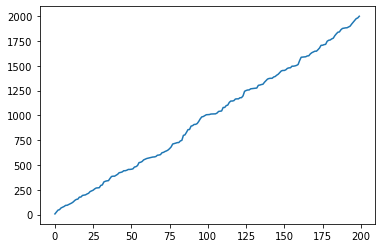

In [8]:
import numpy as np
import matplotlib.pylab as plt

#On écrit le testeur de notre système

"""
Données de test
"""
size = 200  #Nombre d'événemets total
tmin = 1 #temps minimun pour effecturer le traitement d'un évènement
tmax = 20 #temps maximum pour effecturer le traitement d'un évènement
tapp = 2000 #temps total d'appartition d'un evènement à traiter

import numpy as np
from random import random

"""
Création de la matrice qui comportera toutes les informations sur les événements
"""
E = np.zeros((4,size))

#indice 0 : id de l'événement 
for i in range(size):
    E[0,i]=i 
    
#indice 1 : date d'apparition de l'événement
#E[1,:] = (np.random.normal(500, 50, size)).astype(int)
for j in range(size):
    #E[1,j]= int(np.random.exponential()*tapp/4)
    E[1,j]= int(random()*tapp) #Répartition uniforme
    if (E[1,j]<0):
        E[1,j]=0
#indice 2 : temps de traitement de l'événement
for k in range(size):
    E[2,k]= int(random()*(tmax-tmin)+tmin)

#indice 3 : résultats, temps d'attente de l'événement

#On trie la liste selon l'ordre d'arrivée des événements.

E=E.T
E = E[E[:,1].argsort()]
E=E.T
    
"""
Calcul des valeurs caractéristiques de la matrice
"""
#temps maximum requis pour effectuer tous les traitements
ttotal=E[1,0]
for l in range(size):
    ttotal+= E[2,l]


plt.plot(E[1,:])


## Premier système : la file
On crée la matrice finale Ef

In [9]:
import numpy as np
from random import random

        
def begin(l,cmpt):
    l[3] = cmpt - l[1]
    

           
Ef = np.zeros((4,size))
Ef=np.copy(E)

#Comportement d'une file

size = len(E[0,:])
cmptFile = np.zeros(int(ttotal))
i = 0
file = []
cmpt = 0
proc = 0
active = False #Y a t-il un traitement en cours ?
start = Ef[0,1]

while (proc < size) and (cmpt<ttotal):
    while (i<size) and (Ef[1,i]==cmpt) :
        file.append(i)

        i+=1
        
    
    if proc==size :
        print("End of processing")
        
    else :
        if (cmpt == (start+ Ef[2,proc])):
            if len(file)>0 :
                proc = int(file[0])
                start = cmpt
                del file[0]
                begin(Ef[:,proc], cmpt)
                active = True
            else : 
                active = False
            
        if active == False :
            if len(file)>0:
                proc = int(file[0])
                start = cmpt
                del file[0]
                begin(Ef[:,proc],cmpt)
                active = True
            else : 
                active = False
    
    cmptFile[cmpt] = len(file)
    cmpt+=1


## Deuxième système : la pile
On crée la matrice finale Ep

In [10]:
import numpy as np
from random import random

        
def begin(l,cmpt):
    l[3] = cmpt - l[1]
    

           
Ep = np.zeros((4,size))
Ep=np.copy(E)

#Comportement d'une pile

size = len(E[0,:])
cmptPile = np.zeros(int(ttotal))
i = 0
pile = []
cmpt = 0
proc = 0
active = False #Y a t-il un traitement en cours ?
start = Ef[0,1]

while (proc < size) and (cmpt<ttotal):
    while (i<size) and (Ef[1,i]==cmpt) :
        pile.append(i)
        i+=1
        
    
    if proc==size :
        print("End of processing")
        
    else :
        if (cmpt == (start+ Ep[2,proc])):
            if len(pile)>0 :
                proc = int(pile[-1])
                start = cmpt
                del pile[-1]
                begin(Ep[:,proc], cmpt)
                active = True
            else : 
                active = False
            
        if active == False :
            if len(pile)>0:
                proc = int(pile[-1])
                start = cmpt
                del pile[-1]
                begin(Ep[:,proc],cmpt)
                active = True
            else : 
                active = False
    
    cmptPile[cmpt] = len(pile)
    cmpt+=1


## Troisième système : la file du plus rapide
On crée la matrice finale Efr

In [11]:
import numpy as np
from random import random
    
def begin(l,cmpt):
    l[3] = cmpt - l[1]
    
def quickEvent(E,file) :
    mini = int(file[0])
    ind_mini = 0
    for i in range(len(file)):
        if (E[2,i]<E[2,file[ind_mini]]):
            mini = int(file[i])
            ind_mini = i
    return mini, ind_mini
           
Efr = np.zeros((4,size))
Efr = np.copy(E)

#Comportement d'une file optimisée

size = len(E[0,:])
cmptFileR = np.zeros(int(ttotal))
i = 0
fileR = []
cmpt = 0
proc = 0
active = False #Y a t-il un traitement en cours ?
start = Efr[0,1]

while (proc < size) and (cmpt<ttotal):
    while (i < size) and (Ef[1,i] == cmpt) :
        fileR.append(i)
        i+=1
    
    if proc ==size :
        print("End of processing")
        
    else :
        if (cmpt == (start+ Efr[2,proc])):
            if len(fileR)>0 :
                mini, ind_mini = quickEvent(Efr,fileR)
                proc = int(mini)
                start = cmpt
                del fileR[ind_mini]
                begin(Efr[:,proc], cmpt)
                active = True
            else : 
                active = False
            
        if active == False :
            if len(fileR)>0:
                mini, ind_mini = quickEvent(Efr,fileR)
                proc = int(mini)
                start = cmpt
                del fileR[ind_mini]
                begin(Efr[:,proc],cmpt)
                active = True
            else : 
                active = False
    
    cmptFileR[cmpt] = len(fileR)
    cmpt+=1

## Affichage des résultats
Ef correspaond à un système file, Ep à un système pile

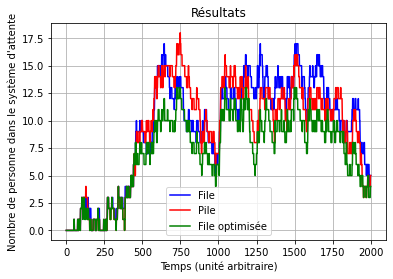

Résulats du système file : 
Moyenne de temps d'attente =  92.265
Médiane =  94.0

Résulats du système pile : 
Moyenne de temps d'attente =  66.525
Médiane =  228.0

Résulats du système file optimisée : 
Moyenne de temps d'attente =  46.475
Médiane =  218.0

Répartition du temps d'attente :
1531.0
1531.0


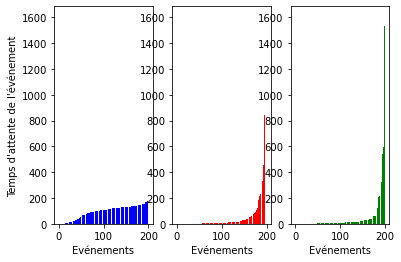

[ 3.  9. 19.]
[0. 0. 0. ... 4. 4. 4.]


In [12]:
import numpy as np
import matplotlib.pylab as plt

abc1 = np.array([x for x in range(int(ttotal))])
def moyenne(E):
    w = 0
    length = len(E[0,:])
    for i in range(length) :
        w+= E[3,i]
    return w/length

def medianequartile(E):
    length = len(E[0,:])
    return np.array([E[3,int(length/4)],E[3,int(length/2)],E[3,int(3*length/4)]])
    

plt.plot(abc1,cmptFile,"b-" ,label = 'File')
plt.plot(abc1,cmptPile,"r-",label = 'Pile')# Tracé de la courbe
plt.plot(abc1,cmptFileR,"g-",label = 'File optimisée')
plt.title('Résultats')  # Ajout d'un titre
plt.xlabel('Temps (unité arbitraire)')         # Nom de la grandeur en abscisse
plt.ylabel('Nombre de personne dans le système d\'attente')  # Nom de la grandeur en ordonnée
plt.legend()
plt.grid()              # Ajout d'une grille
plt.show()              # Affichage

print("Résulats du système file : ")
print("Moyenne de temps d'attente = ", moyenne(Ef))
print("Médiane = ",medianequartile(Ef)[1])
print("")
print("Résulats du système pile : ")
print("Moyenne de temps d'attente = ", moyenne(Ep))
#print(medianequartile(Ep))
print("Médiane = ", medianequartile(Ep)[1])
print("")
print("Résulats du système file optimisée : ")
print("Moyenne de temps d'attente = ", moyenne(Efr))
print("Médiane = ",medianequartile(Efr)[1])

Ef=Ef.T
Ef = Ef[Ef[:,3].argsort()]
Ef=Ef.T
Ep=Ep.T
Ep = Ep[Ep[:,3].argsort()]
Ep=Ep.T
Efr=Efr.T
Efr = Efr[Efr[:,3].argsort()]
Efr=Efr.T

print("")
print("Répartition du temps d'attente :")

max_wait = max([max(Ef[3,:]),max(Ep[3,:]),max(Efr[3,:])])
abc2=np.array([x for x in range(size)])
plt.subplot(1,3,1)
plt.bar(abc2, Ef[3,:],color ='b') 
plt.ylim(0, max_wait*1.1)
plt.ylabel("Temps d'attente de l'événement")
plt.xlabel("Evénements")  

plt.subplot(1,3,2)
plt.bar(abc2, Ep[3,:],color = 'r') 
plt.ylim(0, max_wait*1.1)
plt.xlabel("Evénements")

plt.subplot(1,3,3)
plt.bar(abc2, Efr[3,:],color = 'g') 
plt.ylim(0, max_wait*1.1)
plt.xlabel("Evénements")
print(max_wait)
print(Ep[3,-1])
plt.show() 
print(medianequartile(Efr))
print(cmptFileR)